In [1]:
import optforge as of
from optforge.benchmark.vobench_benchmarks import VOBenchmark
import vobench as vb
import numpy as np
import nlopt
import scipy.optimize
inputs = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg")[:,:,0]
targets = vb.imread(r"F:\Stuff\Programming\AI\VOBench\notebooks\affine\A.jpeg")[:,:,0]

FileNotFoundError: No such file: 'F:\Stuff\Programming\AI\VOBench\notebooks\affine\A2.jpeg'

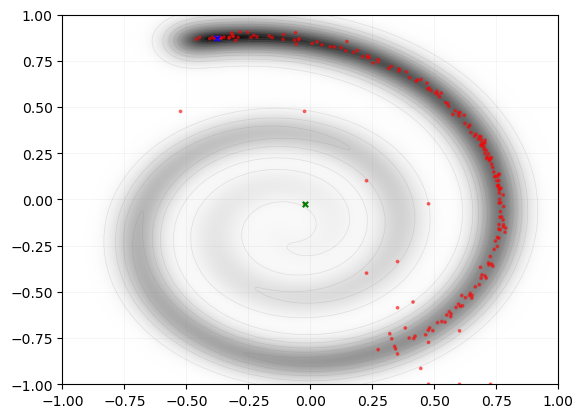

In [3]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

nlopt.srand(0)

opt = nlopt.opt(nlopt.LN_NELDERMEAD, 2)
opt.set_lower_bounds([-1, -1])
opt.set_upper_bounds([1, 1])
opt.set_maxeval(1000)
opt.set_min_objective(lambda x, grad: vob.step_noline(x))

opt.optimize(vob.params)

vob.plot()

evals: 1000/1000 | best value: 0.0196                            
Job finished in 0.2s., did 1000 evaluations.


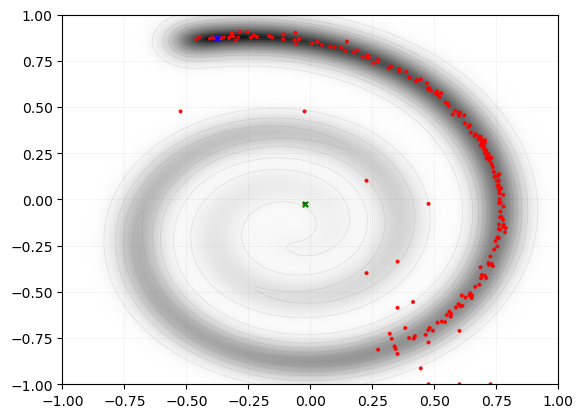

In [4]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.NLoptWrapper('LN_NELDERMEAD', seed=0)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()

None
RuntimeError('nlopt failure')


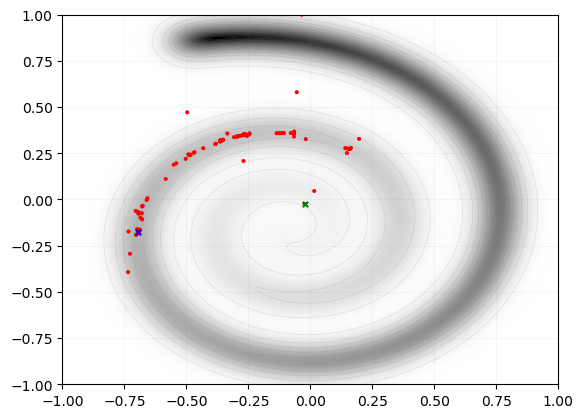

In [5]:
import scipy.optimize
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

nlopt.srand(0)

opt = nlopt.opt(nlopt.LD_LBFGS, 2)
opt.set_lower_bounds([-1, -1])
opt.set_upper_bounds([1, 1])
opt.set_maxeval(1000)

print(opt.get_errmsg())

def objective(x:np.ndarray, grad: np.ndarray):
    grad[:] = scipy.optimize.approx_fprime(x, vob.step_noline,)
    return vob.step_noline(x)

opt.set_min_objective(objective)

try: opt.optimize(vob.params)
except RuntimeError as e: print(f'{e!r}')

vob.plot()

evals: 1001/1001 | best value: 0.7256                            
Job finished in 0.3s., did 1001 evaluations.


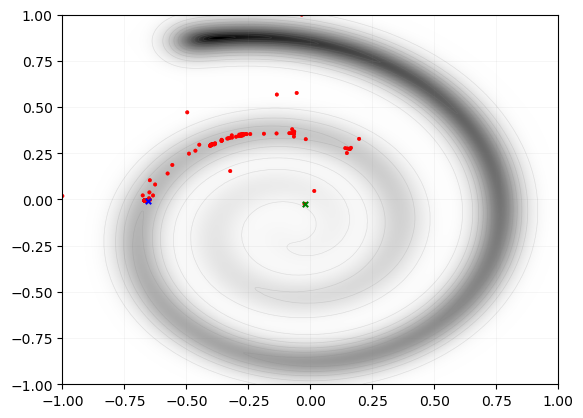

In [6]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.NLoptWrapper('LD_LBFGS', seed=0, grad_eps=1e-5)

study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()

evals: 1000/1000 | best value: 0.5887                            
Job finished in 0.3s., did 1000 evaluations.


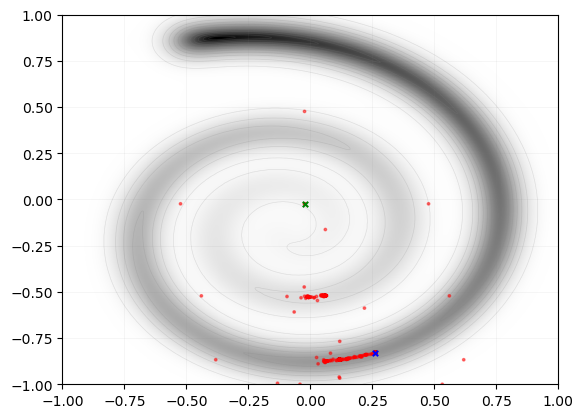

In [8]:
vob = vb.ImageDescent(vb.surfaces.OUTWARD_GAUSS, (500,500),)

optimizer = of.integrations.NLoptWrapper('LN_BOBYQA', seed=0, grad_eps=1e-5)
study = of.minimize(
    vob.step_noline,
    vob.params,
    optimizer,
    max_evals = 1000,
    bounds = (-1, 1)
)

vob.plot()